<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/immp_tpc_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pylab as pl
import csv

In [3]:
class SOM(object):
    def __init__(self, X, output, iteration, batch_size):
        """
        :param X:  形状是N*D， 输入样本有N个,每个D维
        :param output: (n,m)一个元组，为输出层的形状是一个n*m的二维矩阵
        :param iteration:迭代次数
        :param batch_size:每次迭代时的样本数量
        初始化一个权值矩阵，形状为D*(n*m)，即有n*m权值向量，每个D维
        """
        self.X = X
        self.output = output
        self.iteration = iteration
        self.batch_size = batch_size
        self.W = np.random.rand(X.shape[1], output[0] * output[1])
        print (self.W.shape)

    def GetN(self, t):
        """
        :param t:时间t, 这里用迭代次数来表示时间
        :return: 返回一个整数，表示拓扑距离，时间越大，拓扑邻域越小
        """
        a = min(self.output)
        return int(a-float(a)*t/self.iteration)

    def Geteta(self, t, n):
        """
        :param t: 时间t, 这里用迭代次数来表示时间
        :param n: 拓扑距离
        :return: 返回学习率，
        """
        return np.power(np.e, -n)/(t+2)

    def updata_W(self, X, t, winner):
        N = self.GetN(t)
        for x, i in enumerate(winner):
            to_update = self.getneighbor(i, N)   ## change i[0] to i
            for j in range(N+1):
                e = self.Geteta(t, j)
                for w in to_update[j]:
                    self.W[:, w] = np.add(self.W[:,w], e*(X[x,:] - self.W[:,w]))

    def getneighbor(self, index, N):
        """
        :param index:获胜神经元的下标
        :param N: 邻域半径
        :return ans: 返回一个集合列表，分别是不同邻域半径内需要更新的神经元坐标
        """
        a, b = self.output
        length = a*b
        def distence(index1, index2):
            i1_a, i1_b = index1 // a, index1 % b
            i2_a, i2_b = index2 // a, index2 % b
            return np.abs(i1_a - i2_a), np.abs(i1_b - i2_b)

        ans = [set() for i in range(N+1)]
        for i in range(length):
            dist_a, dist_b = distence(i, index)
            if dist_a <= N and dist_b <= N: ans[max(dist_a, dist_b)].add(i)
        return ans




    def train(self):
        """
        train_Y:训练样本与形状为batch_size*(n*m)
        winner:一个一维向量，batch_size个获胜神经元的下标
        :return:返回值是调整后的W
        """
        count = 0
        while self.iteration > count:
            train_X = self.X[np.random.choice(self.X.shape[0], self.batch_size)]
            normal_W(self.W)
            normal_X(train_X)
            train_Y = train_X.dot(self.W)
            winner = np.argmax(train_Y, axis=1).tolist()
            self.updata_W(train_X, count, winner)
            count += 1
        return self.W

    def train_result(self):
        normal_X(self.X)
        train_Y = self.X.dot(self.W)
        winner = np.argmax(train_Y, axis=1).tolist()
        print (winner)
        return winner

def normal_X(X):
    """
    :param X:二维矩阵，N*D，N个D维的数据
    :return: 将X归一化的结果
    """
    N, D = X.shape
    for i in range(N):
        temp = np.sum(np.multiply(X[i], X[i]))
        X[i] /= np.sqrt(temp)
    return X
def normal_W(W):
    """
    :param W:二维矩阵，D*(n*m)，D个n*m维的数据
    :return: 将W归一化的结果
    """
    for i in range(W.shape[1]):
        temp = np.sum(np.multiply(W[:,i], W[:,i]))
        W[:, i] /= np.sqrt(temp)
    return W

#画图
def draw(C):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)

    pl.legend(loc='upper center')
    pl.show()


In [7]:
print("\nLoading TPC data into memory \n")
data_file = "vTestData102-nohead.csv"
#dataset = np.loadtxt(data_file, delimiter=",", usecols=range(0,15),dtype=np.float64)
with open(data_file, 'r') as f:
    data = list(csv.reader(f, delimiter=","))
dataset = np.array(data, dtype=np.float)
print(dataset.shape)
dataset_old = dataset.copy()


Loading TPC data into memory 

(195, 15)


In [8]:
som = SOM(dataset, (5, 5), 1, 30)
som.train()
res = som.train_result()

(15, 25)
[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 1, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 3, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 3, 0, 3, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]


In [9]:
classify = {}
for i, win in enumerate(res):
    if not classify.get(win):   # change win[0] to win ==> three lines
        classify.setdefault(win, [i])
    else:
        classify[win].append(i)

In [10]:
C = []#未归一化的数据分类结果
D = []#归一化的数据分类结果
for i in classify.values():
    C.append(dataset_old[i].tolist())
    D.append(dataset[i].tolist())

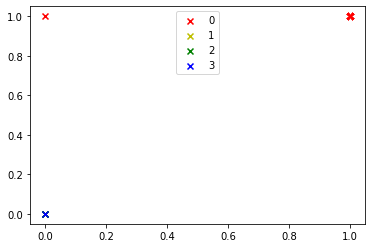

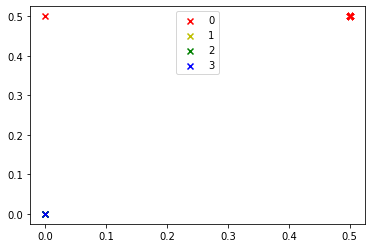

In [11]:
draw(C)
draw(D)

In [12]:
print('--------------------------------------------------------')
print(np.unique(res))
print(len(classify))

--------------------------------------------------------
[ 0  1  3 22]
4


In [13]:
values, counts = np.unique(res, return_counts=True)
print(values)
print(counts)
print('--------------------------------------------------------')

[ 0  1  3 22]
[  1   1   3 190]
--------------------------------------------------------


In [14]:
bb=dict(zip(list(res),[list(res).count(i) for i in list(res)]))
print(bb)

{22: 190, 1: 1, 3: 3, 0: 1}
